## Lecture Note - Section 02

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### I. Fitness and selection

1. Fitness: an abstract concept measuring how much an individual contributes to the next generation
   * Absolute fitness (Malthusian fitness): the (expected) number of offsprings a particular individual leaves in the next generation.
   * Relative fitness: absolute fitness scaled by its average value across individuals.
   * Fitness can be defined on various levels (genotypes, alleles, individuals etc.), but it’s most often defined on the level where selection operates (e.g. an individual’s genotype).
   
    
2. Types of mutations: beneficial, deleterious, neutral


3. Types of selection in terms of:
   * Its effect on a particular allele:
      * Positive selection: increases the allele frequency
      * Negative selection: decreases the allele freqeuency (also called purifying selection)
   * Its effect on a trait (usually polygenic):
      * Stabilizing selection: maintains the current mean trait value
      * Directional selection: increases or decreases the mean trait value
      * Disruptive selection: in favor of deviating from the current mean (in both directions)
      
      
4. Modelling deterministic selection (originally by J.B.S. Haldane)
   * Assumptions: very large population; mating is random; selection works on the viability of individuals (i.e., determines whether an individual will live up to the stage of reproduction); generations are discrete.
   * Formulation: if we only have one locus and two alleles $A$ & $a$. We can track the frequencies of both alleles using the following procedure:
       | Genotype | $AA$  | $Aa$  | $Aa$  |
       |----------|---|---|---|
       |  Fitness ($0\le w_i\le 1$)        | $w_1$  | $w_2$  | $w_3$  |
       |  Genotype frequency at generation $n$ before selection ($p$ = Freq($A$))  | $p_1=p^2$  | $p_2=2p(1-p)$  | $p_3=(1-p)^2$  |
       |  Mean fitness: $$\bar{w} = p_1 w_1 + p_2 w_2 + p_3 w_3$$ |   |   |   |
       | Genotype frequency at generation $n$ after selection | $$\frac{p_1 w_1}{\bar{w}}$$| $$\frac{p_2 w_2}{\bar{w}}$$ |  $$\frac{p_3 w_3}{\bar{w}}$$|
       | Allele frequency at generation $n+1$: $$p' = \text{Freq}(A) = \frac{p_1 w_1}{\bar{w}} + \frac{p_2 w_2}{2\bar{w}}$$ ||||
        
      Hence the change in allele $A$'s frequency is:
      
       $$
       \begin{align*}
       \Delta p &= p'-p = p^2\frac{w_1}{\bar{w}} + p(1-p)\frac{w_2}{\bar{w}} - p \\
        &= \frac{p(1-p)}{2}\frac{2p w_1 + 2(1-2p)w_2 -2(1-p)w_3}{\bar{w}}\\
        &= \frac{p(1-p)}{2}\frac{\partial\bar{w}/\partial p}{\bar{w}} \\
        &= \frac{1}{2}\frac{\partial \ln(\bar{w})}{\partial p} p(1-p)
       \end{align*}
       $$
       
      This famous expression has several immediate implications:
        * The change in allele frequency per generation is proportional to the genetic variation ($\propto p(1-p)$) within the population (Darwin's first condition: evolution has to act on variation!)
        * The change in allele frequency per generation is also proportional to the gradient $\partial {\ln(\bar{w})}/\partial p$.
        
        
5. Adaptive landscape (aka fitness landscape).

    * Intuition: selection operates to maximize a population's overall fitness
    * The adaptive landscape under the single-locus selection model is precisely the function we just discovered:
    $$
    \ln(\bar{w})
    $$
      Using this metaphor, the selection dynamics can be visualized as:
      
      ![image](adaptivelandscape_1locus.png)
      
      It turns out that you can define adaptive landscape for traits too, such as:
      
      <img src="adaptivelandscape_trait.png" width="60%">
      

### II. Some special cases of the selection equation $\Delta p = \frac{1}{2}\frac{\partial \ln(\bar{w})}{\partial p}p(1-p)$, assuming that $A$ is a newly emerged beneficial mutation.

1. $A$ is dominant to $a$.

Here, $AA$ and $Aa$ have the same fitness $w(1+s)$, while $aa$'s fitness is $w$. $s>0$ is the selection coefficient that quantifies how much fitness is gained by genotypes having allele $A$. We can show that

$$
\Delta p = \frac{1}{2}\frac{2(1-p)s}{1+(1-(1-p)^2)s}p(1-p)\approx sp(1-p)^2,\quad \text{if }s \text{ is small}
$$

Text(0.5, 1.0, 'Dominant A')

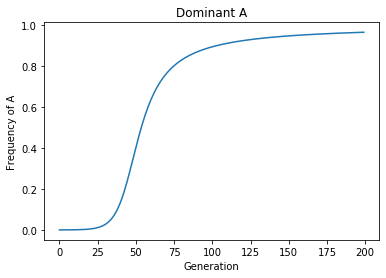

In [21]:
s = 0.2
p = [0.0001]
n = range(200)
for i in n:
    p.append(p[-1] + s * p[-1] * (1-p[-1])**2)
plt.plot(n,p[1:])
plt.xlabel('Generation')
plt.ylabel('Frequency of A')
plt.title('Dominant A')

2. $A$ is recessive to $a$

Here, AA's fitness is still $w(1+s)$, but both $Aa$ and $aa$ have fitness $w$. Then
$$
\Delta p =\frac{1}{2}\frac{2sp}{1+sp^2}p(1-p)\approx sp^2(1-p),\quad \text{if }s\text{ is small}
$$

Text(0.5, 1.0, 'Recessive A')

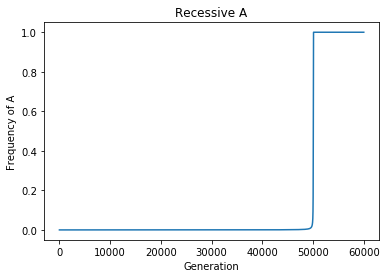

In [20]:
s = 0.2
p = [0.0001]
n = range(60000)
for i in n:
    p.append(p[-1] + s * (p[-1])**2 * (1-p[-1]))
plt.plot(n,p[1:])
plt.xlabel('Generation')
plt.ylabel('Frequency of A')
plt.title('Recessive A')

3. $A$ and $a$ are codominant (i.e., heterozygote's fitness is the average of the two homozygotes)

Here, $AA$'s fitness is $w(1+s)$, while $Aa$'s fitness is $w(1+s/2)$, and $aa$'s fitness is $w$. Then

$$
\Delta p = \frac{1}{2}\frac{s}{1+sp}p(1-p)\approx\frac{1}{2}sp(1-p),\quad \text{if }s\text{ is small}
$$

Text(0.5, 1.0, 'Codominant A')

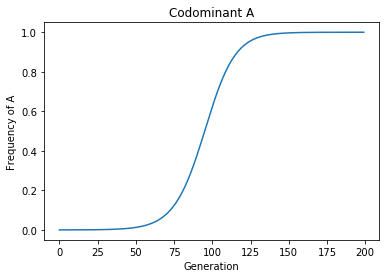

In [23]:
s = 0.2
p = [0.0001]
n = range(200)
for i in n:
    p.append(p[-1] + s/2 * (p[-1]) * (1-p[-1]))
plt.plot(n,p[1:])
plt.xlabel('Generation')
plt.ylabel('Frequency of A')
plt.title('Codominant A')

**Conclusion**: Even if allele $A$ has the same selective coefficient, recessive alleles tend to take significantly longer time to reach high frequencies in the population! In the example above, it takes ~200 generations for dominant or codominant $A$, but 50000 generations for recessive $A$.